# Segmentez des clients d'un site e-commerce - 1

  - [Concaténation des bases de données](#Concaténation-des-bases-de-données)
  - [Données manquantes](#Données-manquantes)
  - [Nombre de clients total et proportion par rapport aux nombres d'achats](#Nombre-de-clients-total-et-proportion-par-rapport-aux-nombres-d'achats)
  - [Origines des clients](#Origines-des-clients)
  - [Origines des vendeurs](#Origines-des-vendeurs)
  - [Montant total d'achats](#Montant-total-d'achats)
  - [Fréquence d'achats](#Fréquence-d'achats)
  - [Nombre de produits achetés par client](#Nombre-de-produits-achetés-par-client)
  - [Evaluation de la relation entre les variables avec la corrélation de Pearson](#Evaluation-de-la-relation-entre-les-variables-avec-la-corrélation-de-Pearson)
  - [Transformation des dates d'achats en nombre de jours écoulés](#Transformation-des-dates-d'achats-en-nombre-de-jours-écoulés)
  -[Nombre d'achats total en fonction du temps](#Nombre-d'achats-total-en-fonction-du-temps)

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_theme(style="whitegrid")

## Concaténation des bases de données

In [212]:
custumers = pd.read_csv("olist_customers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")

La dataframe **product_name** contient 2 variables correspondants aux noms de catégories de produits respectivement en langue portugaise et anglaise. Je vais essayer de  convertir ces 2 colonnes en un dictionnaire.

In [213]:
products_name_dict = dict(zip(product_name.product_category_name, product_name.product_category_name_english))

In [214]:
products = products.replace({"product_category_name": products_name_dict})

J'ai remplacé les noms de catégories dans la colonne **product_category_name** de la dataframe **products** par des noms en anglais à l'aide du dictionnaire créé à partir de la dataframe **product_name**

Seulement les 2 variables de la dataframe products nous intéressent, je vais supprimer les autres variables correspondants aux valeurs de taille et du poids des produits.

In [215]:
products = products[["product_id","product_category_name"]]

In [216]:
table_1 = pd.merge(custumers,orders,on="customer_id")
table_2 = pd.merge(table_1,items,on="order_id")
table_3 = pd.merge(table_2,products,on="product_id")
table_4 = pd.merge(table_3,reviews,on="order_id")
table_5 = pd.merge(table_4,payments,on="order_id")
table_6 = pd.merge(table_5,sellers,on="seller_id")

In [217]:
table_6 = table_6.drop_duplicates(subset="customer_id")# supprimer les lignes dupliquées en se basant sur l'id unique des commandes

In [218]:
table_6["order_approved_at"] = table_6["order_approved_at"].str.split().str[0]

In [219]:
table_6["order_approved_at"] = pd.to_datetime(table_6["order_approved_at"])

In [220]:
table_6["order_approved_at"].sort_values()

116922   2016-10-04
11286    2016-10-04
46827    2016-10-04
27926    2016-10-04
96430    2016-10-04
96427    2016-10-04
51214    2016-10-04
11298    2016-10-04
78881    2016-10-04
78883    2016-10-04
84805    2016-10-04
109257   2016-10-04
5257     2016-10-04
111198   2016-10-04
112022   2016-10-04
113781   2016-10-04
97995    2016-10-04
107504   2016-10-04
106781   2016-10-04
94789    2016-10-05
106153   2016-10-05
112524   2016-10-05
73315    2016-10-05
80117    2016-10-05
11104    2016-10-05
60522    2016-10-05
109973   2016-10-05
80028    2016-10-05
106159   2016-10-05
105215   2016-10-06
116728   2016-10-06
51325    2016-10-06
105502   2016-10-06
78878    2016-10-06
78879    2016-10-06
42545    2016-10-06
105211   2016-10-06
78884    2016-10-06
102476   2016-10-06
65139    2016-10-06
51330    2016-10-06
111078   2016-10-06
114968   2016-10-06
47005    2016-10-06
47026    2016-10-06
112031   2016-10-06
112024   2016-10-06
113778   2016-10-06
113779   2016-10-06
113780   2016-10-06


In [221]:
print(table_6["order_approved_at"].min())# la plus vieille date de commande 
print(table_6["order_approved_at"].max())# la plus récente date de commande

2016-10-04 00:00:00
2018-09-03 00:00:00


In [222]:
table_6.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,credit_card,2,146.87,8577,itaquaquecetuba,SP
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture,7fc63200f12eebb5f387856afdd63db8,1,NaN,"GOSTARIA DE UMA SOLUÇÃO, ESTOU PRECISANDO MUIT...",2017-11-29 00:00:00,2017-12-01 19:41:59,1,credit_card,1,275.79,8577,itaquaquecetuba,SP
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08,2017-05-19 20:16:31,2017-05-26 09:54:04,2017-06-12 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture,251191809e37c1cffc16865947c18a4d,3,NaN,"Produto compatível com seu valor, muito bonito...",2017-05-27 00:00:00,2017-05-28 02:43:16,1,credit_card,7,140.61,8577,itaquaquecetuba,SP
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04,2018-02-19 18:21:47,2018-02-28 21:09:00,2018-03-22 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture,f7123bac5b91a0e2e38d8b41fd1206f4,4,NaN,Entregou antes do prazo,2018-03-01 00:00:00,2018-03-02 11:11:24,1,credit_card,10,137.58,8577,itaquaquecetuba,SP
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,574fe1739f65af76badd0999db300b4f,delivered,2017-03-23 15:10:17,2017-03-23,2017-03-28 18:23:51,2017-04-11 10:16:56,2017-04-24 00:00:00,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-04-05 15:25:11,126.99,15.06,office_furniture,1496c2a9c41a846ba946a98a09879660,4,NaN,NaN,2017-04-12 00:00:00,2017-04-15 15:34:45,1,credit_card,5,142.05,8577,itaquaquecetuba,SP


- Je vais maintenant supprimer les colonnes qui ne sont pas utiles dans l'analyse exploratoire (exemple : date de délivération, date de transport...)

In [223]:
table_7 = table_6[["customer_id","customer_unique_id","customer_city","order_id","order_item_id","product_id","seller_id","order_approved_at","price","freight_value","product_category_name","review_id","review_score","payment_type","payment_installments","payment_value","seller_city"]]

### Données manquantes

customer_id              0.0
customer_unique_id       0.0
customer_city            0.0
order_id                 0.0
order_item_id            0.0
product_id               0.0
seller_id                0.0
order_approved_at        0.0
price                    0.0
freight_value            0.0
product_category_name    1.4
review_id                0.0
review_score             0.0
payment_type             0.0
payment_installments     0.0
payment_value            0.0
seller_city              0.0
dtype: float64

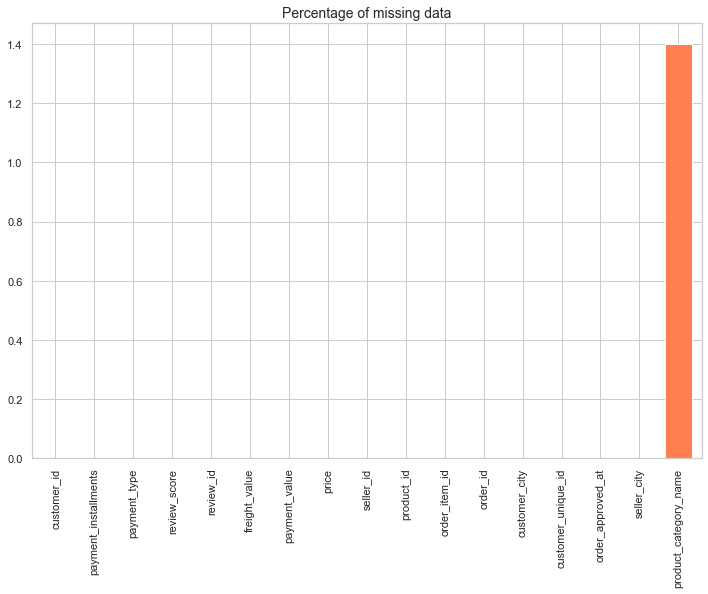

In [224]:
missing_data = round(table_7.isna().sum()*100/len(table_7),1)
ax = missing_data.sort_values().plot.bar(figsize=(12,8),color="coral",width=0.7)
ax.set_title("Percentage of missing data", fontsize=14)
missing_data

- Il existe quasiment pas de données manquantes dans la base de données, la variable product_categoriy_name présente un taux très faible de données manquantes (1.4%). Les lignes contenant ces valeurs vont être simplement supprimées.

In [225]:
df_final = table_7.dropna()

In [227]:
df_final.head(5)

,customer_id,customer_unique_id,customer_city,order_id,order_item_id,product_id,seller_id,order_approved_at,price,freight_value,product_category_name,review_id,review_score,payment_type,payment_installments,payment_value,seller_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,00e7ee1b050b8499577073aeb2a297a1,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-16,124.99,21.88,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4,credit_card,2,146.87,itaquaquecetuba
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,c1d2b34febe9cd269e378117d6681172,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-10,112.99,24.90,office_furniture,7fc63200f12eebb5f387856afdd63db8,1,credit_card,1,275.79,itaquaquecetuba
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,b1a5d5365d330d10485e0203d54ab9e8,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-08,124.99,15.62,office_furniture,251191809e37c1cffc16865947c18a4d,3,credit_card,7,140.61,itaquaquecetuba
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,2e604b3614664aa66867856dba7e61b7,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-04,106.99,30.59,office_furniture,f7123bac5b91a0e2e38d8b41fd1206f4,4,credit_card,10,137.58,itaquaquecetuba
5,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,angelina,574fe1739f65af76badd0999db300b4f,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-03-23,126.99,15.06,office_furniture,1496c2a9c41a846ba946a98a09879660,4,credit_card,5,142.05,itaquaquecetuba


### Nombre de clients total et proportion par rapport aux nombres d'achats

In [228]:
print("La base de données finale compte {} clients".format(df_final.customer_unique_id.unique().shape[0]))

La base de données finale compte 93381 clients


In [229]:
cust_1 = df_final.groupby("customer_unique_id").filter(lambda x: len(x) == 1)
print("La base de données contient {} clients qui ont procédé à 1 achat".format(cust_1.customer_unique_id.unique().shape[0]))
nombre_achat_1 = cust_1.customer_unique_id.unique().shape[0]

La base de données contient 90574 clients qui ont procédé à 1 achat


In [230]:
cust_2 = df_final.groupby("customer_unique_id").filter(lambda x: len(x) > 1)
print("La base de données contient {} clients qui ont procédé à au moins 2 achats".format(cust_2.customer_unique_id.unique().shape[0]))
nombre_achat_2 = cust_2.customer_unique_id.unique().shape[0]

La base de données contient 2807 clients qui ont procédé à au moins 2 achats


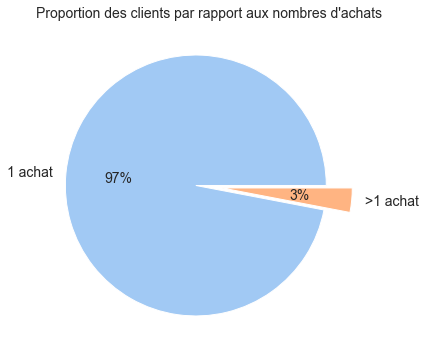

In [231]:
plt.figure(figsize=(6, 6))
data = [nombre_achat_1, nombre_achat_2]
labels = ["1 achat",'>1 achat']

colors = sns.color_palette('pastel')

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', textprops={'fontsize': 14},pctdistance=0.6,explode=[0.1]*2)
plt.title("Proportion des clients par rapport aux nombres d'achats",fontsize=14)
plt.show()

In [232]:
cities_cust = df_final.customer_city.value_counts()[:6]

### Origines des clients

Text(0.5, 1.0, "L'origine des clients")

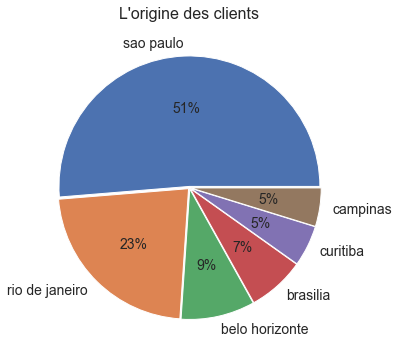

In [233]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.pie(cities_cust, labels = cities_cust.index, autopct = '%.0f%%',explode=[0.01]*6,textprops={'fontsize': 14})
ax.set_title("L'origine des clients",fontsize=16)

### Origines des vendeurs

In [234]:
seller = df_final.seller_city.value_counts()[:6]

Text(0.5, 1.0, "L'origine des vendeurs")

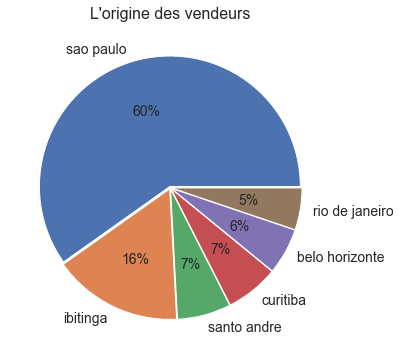

In [235]:
fig, ax = plt.subplots(figsize =(6, 6))
ax.pie(seller, labels = seller.index, autopct = '%.0f%%',explode=[0.01]*6,textprops={'fontsize': 14})
ax.set_title("L'origine des vendeurs",fontsize=16)

### Montant total d'achats

In [236]:
df_final = df_final.rename(columns={"price":"Montant"})

In [237]:
Montant = df_final.groupby(by="customer_unique_id").sum()
Montant = Montant.sort_values(by="Montant",ascending=False)

In [238]:
Montant = Montant.sort_values(by="Montant",ascending=False)

Text(0.5, 1.0, "Le montant total payé par chaque client pour l'ensemble des achats effectués")

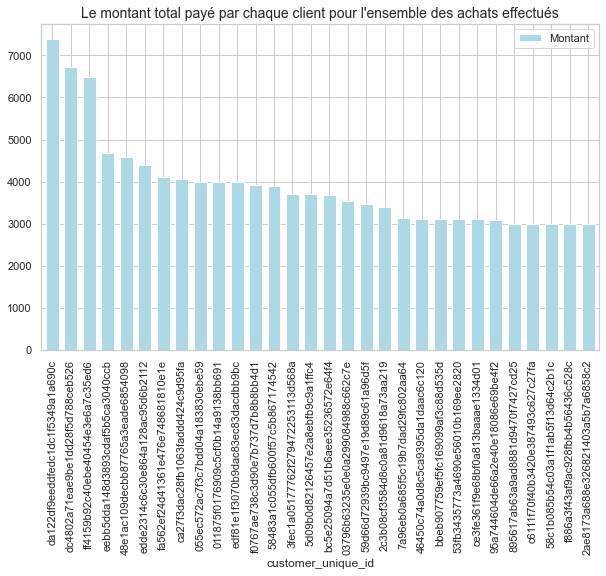

In [240]:
ax = Montant[:30].plot.bar(y="Montant",figsize=(10,6),color="lightblue",width=0.7)
ax.set_title("Le montant total payé par chaque client pour l'ensemble des achats effectués", fontsize=14)

[Text(0.5, 1.0, "box plot des montants payés par les clients sur l'ensemble des achats")]

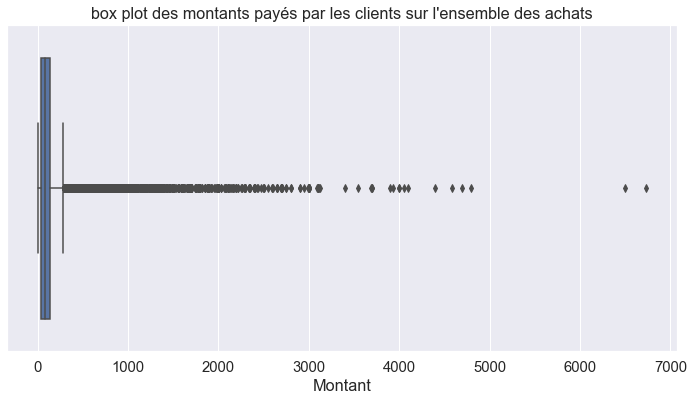

In [241]:
plt.figure(figsize=(12,6))
sns.set(font_scale = 1.35)

sns.boxplot(x="Montant",data=df_final).set(title="box plot des montants payés par les clients sur l'ensemble des achats")


### Fréquence d'achats

In [242]:
frequence = pd.DataFrame(df_final.customer_unique_id.value_counts().reset_index())

In [243]:
frequence.columns=["customer_unique_id","Fréquence"]

Text(0.5, 1.0, "Le nombre total d'achats par chaque client")

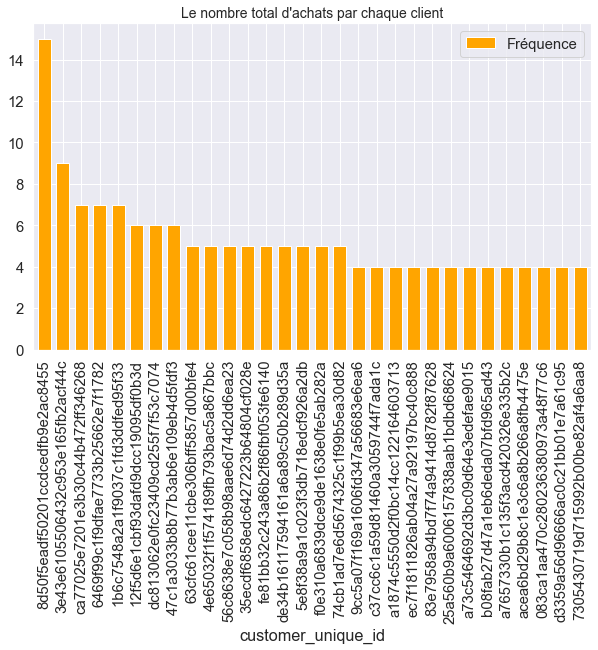

In [244]:
ax = frequence[:30].plot.bar(x="customer_unique_id", y="Fréquence",figsize=(10,6),color="orange",width=0.7)
ax.set_title("Le nombre total d'achats par chaque client", fontsize=14)

<AxesSubplot:xlabel='Fréquence'>

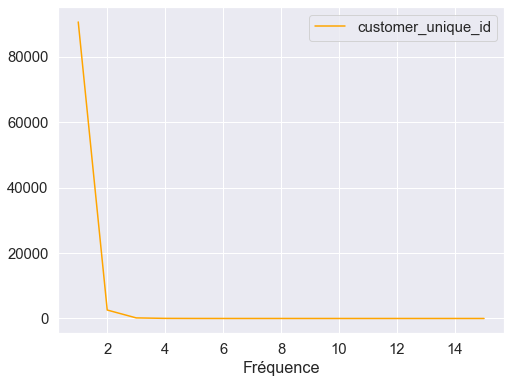

In [245]:
frequence.groupby("Fréquence").count().plot(figsize=(8,6),color="orange")

### Nombre de produits achetés par client

In [246]:
cust_total_price = df_final.groupby(by="customer_unique_id").sum()

In [247]:
cust_total_price = cust_total_price.reset_index()

In [248]:
cluster_table = pd.merge(cust_total_price,freq_achats,on="customer_unique_id")

In [249]:
cluster_table = cluster_table.sort_values(by="Fréquence",ascending=False)

In [250]:
cluster_table.head(5)

,customer_unique_id,order_item_id,Montant,freight_value,review_score,payment_installments,payment_value,Fréquence
51497,8d50f5eadf50201ccdcedfb9e2ac8455,15,659.72,160.43,75,19,820.15,15
22820,3e43e6105506432c953e165fb2acf44c,12,657.25,124.42,25,64,1172.66,9
73962,ca77025e7201e3b30c44b472ff346268,7,666.66,167.18,35,7,1122.72,7
10073,1b6c7548a2a1f9037c1fd3ddfed95f33,8,621.22,98.87,35,7,925.62,7
36751,6469f99c1f9dfae7733b25662e7f1782,7,614.40,79.22,35,20,758.83,7


Text(0.5, 1.0, 'Le nombre total de produits achetés par chaque client')

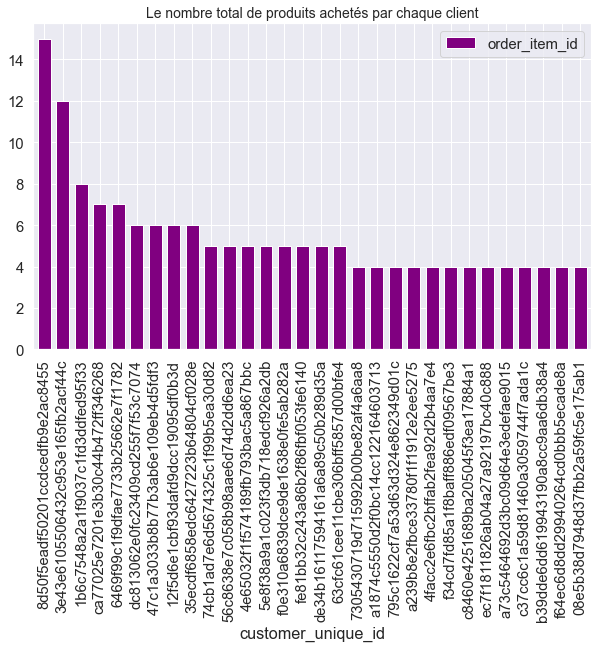

In [251]:
ax = cluster_table[:30].sort_values(by="order_item_id",ascending=False).plot.bar(x="customer_unique_id", y="order_item_id",figsize=(10,6),color="purple",width=0.7)
ax.set_title("Le nombre total de produits achetés par chaque client", fontsize=14)

<AxesSubplot:xlabel='order_item_id'>

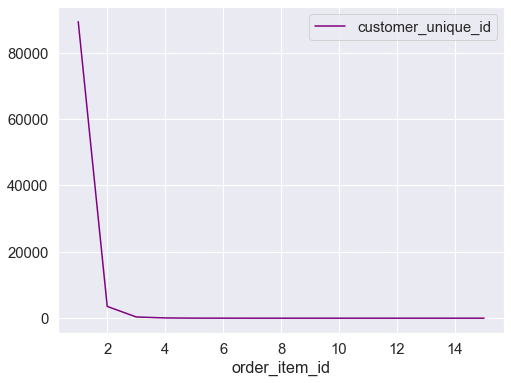

In [252]:
oi = cluster_table[["customer_unique_id","order_item_id"]]
oi.groupby("order_item_id").count().plot(figsize=(8,6),color="purple")

### Evaluation de la relation entre les variables avec la corrélation de Pearson

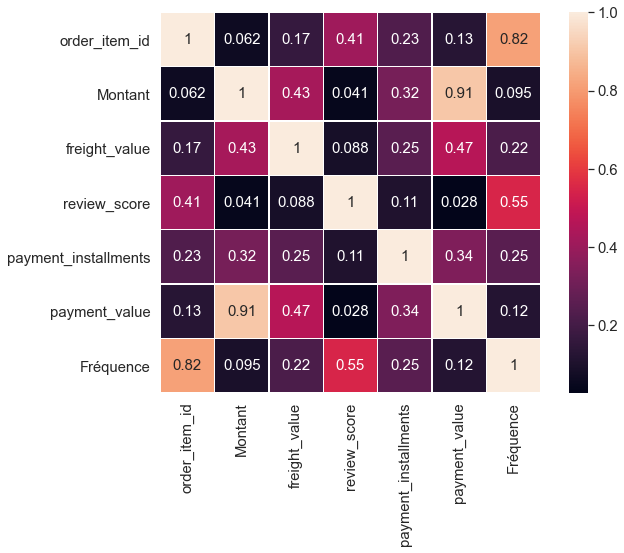

In [253]:
plt.figure(figsize=(10, 7))
sns.heatmap(cluster_table.corr(), annot=True, square=True, linewidths=.5, annot_kws={"size":15})
plt.show()

In [254]:
cluster_table.head(5)

,customer_unique_id,order_item_id,Montant,freight_value,review_score,payment_installments,payment_value,Fréquence
51497,8d50f5eadf50201ccdcedfb9e2ac8455,15,659.72,160.43,75,19,820.15,15
22820,3e43e6105506432c953e165fb2acf44c,12,657.25,124.42,25,64,1172.66,9
73962,ca77025e7201e3b30c44b472ff346268,7,666.66,167.18,35,7,1122.72,7
10073,1b6c7548a2a1f9037c1fd3ddfed95f33,8,621.22,98.87,35,7,925.62,7
36751,6469f99c1f9dfae7733b25662e7f1782,7,614.40,79.22,35,20,758.83,7


In [255]:
date = df_final[["customer_unique_id","order_approved_at"]]

In [256]:
date.head(5)

,customer_unique_id,order_approved_at
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16
1,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-10
3,3c799d181c34d51f6d44bbbc563024db,2017-05-08
4,23397e992b09769faf5e66f9e171a241,2018-02-04
5,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23


### Transformation des dates d'achats en nombre de jours écoulés 

In [257]:
today = pd.to_datetime("2022-01-01")
dt = date.copy()
dt["Récence"] = (today - date["order_approved_at"]).dt.days

**Je vais garder la date d'achat la plus récente pour distinguer les nouveaux et les anciens cliens**

In [258]:
dt = dt.groupby("customer_unique_id").agg("min").reset_index()

In [259]:
cluster_table_final = pd.merge(cluster_table,dt,on="customer_unique_id")

In [260]:
cluster_table_final.head(5)

,customer_unique_id,order_item_id,Montant,freight_value,review_score,payment_installments,payment_value,Fréquence,order_approved_at,Récence
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,659.72,160.43,75,19,820.15,15,2017-05-15,1230
1,3e43e6105506432c953e165fb2acf44c,12,657.25,124.42,25,64,1172.66,9,2017-09-18,1404
2,ca77025e7201e3b30c44b472ff346268,7,666.66,167.18,35,7,1122.72,7,2017-10-10,1309
3,1b6c7548a2a1f9037c1fd3ddfed95f33,8,621.22,98.87,35,7,925.62,7,2017-11-13,1416
4,6469f99c1f9dfae7733b25662e7f1782,7,614.40,79.22,35,20,758.83,7,2017-09-19,1283


**Je vais attribuer un score d'avis moyen pour chaque client qui correspond à la moyenne des avis du client pour chacune de ces commandes effectuées. Le score va etre arrondi.** 

In [265]:
cluster_table_final["Avis"] = round(cluster_table_final["review_score"] / \
                                           cluster_table_final["Fréquence"])


In [268]:
cluster_table_final = cluster_table_final[["customer_unique_id","Montant","Fréquence","Récence","Avis"]]

In [269]:
cluster_table_final.head(5)

,customer_unique_id,Montant,Fréquence,Récence,Avis
0,8d50f5eadf50201ccdcedfb9e2ac8455,659.72,15,1230,5.0
1,3e43e6105506432c953e165fb2acf44c,657.25,9,1404,3.0
2,ca77025e7201e3b30c44b472ff346268,666.66,7,1309,5.0
3,1b6c7548a2a1f9037c1fd3ddfed95f33,621.22,7,1416,5.0
4,6469f99c1f9dfae7733b25662e7f1782,614.40,7,1283,5.0


In [270]:
cluster_table_final.Avis.agg(["min","max"])

min    1.0
max    5.0
Name: Avis, dtype: float64

In [271]:
cluster_table_final.Montant.agg(["min","max"])

min       0.85
max    7388.00
Name: Montant, dtype: float64

In [272]:
cluster_table_final["Récence"].min()

1216

In [273]:
cluster_table_final["Récence"].max()

1915

### Nombre d'achats total en fonction du temps

Text(0.5, 1.0, "Evolution du nombre d'achats en fonction du temps")

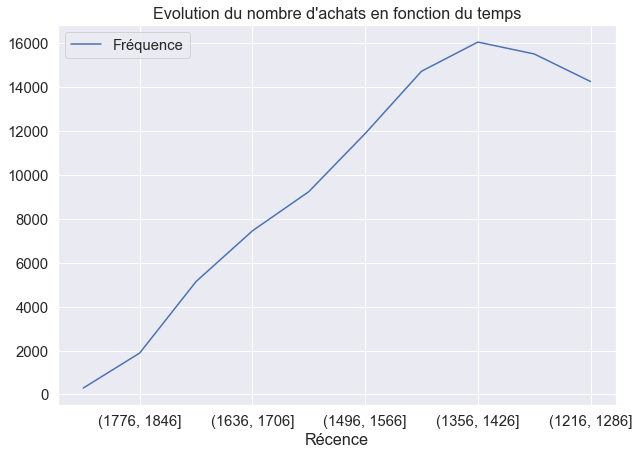

In [274]:
achats_temps = cluster_table_final.groupby(pd.cut(cluster_table_final["Récence"], np.arange(1216,1917,70))).sum()
achats_temps = achats_temps[["Fréquence"]]

ax = achats_temps.plot(figsize=(10,7))
ax.invert_xaxis()
plt.title("Evolution du nombre d'achats en fonction du temps")

In [275]:
achats_temps = cluster_table_final.groupby(pd.cut(cluster_table_final["Récence"], np.arange(1216,1917,10))).sum()
achats_temps = achats_temps[["Fréquence"]]

Text(0.5, 1.0, "Evolution du nombre d'achats en fonction du temps")

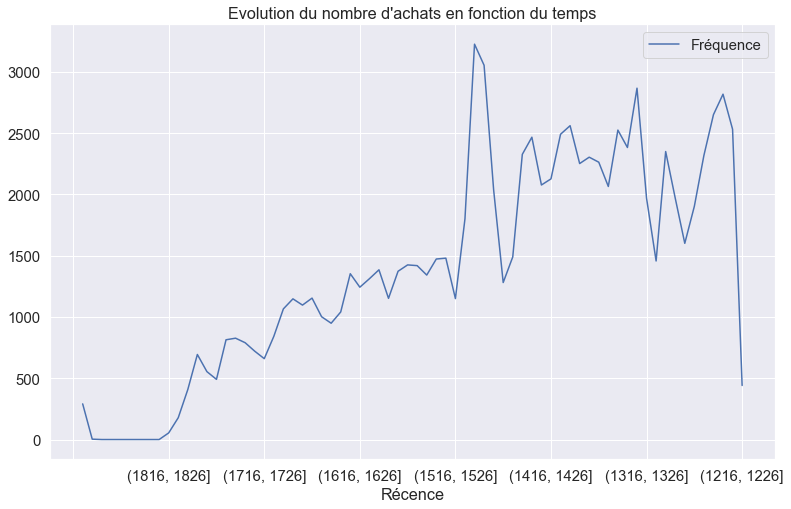

In [279]:
ax = achats_temps.plot(figsize=(13,8))
ax.invert_xaxis()
plt.title("Evolution du nombre d'achats en fonction du temps")

In [63]:
cluster_table_final.to_csv("table_seg")#sauvegarde de la base de données finale sous un nouveau nom 